In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline

### Description of data: 
Every participant has one file 1d array with 400 rows (each corresponding to a node) for each of the following conditions: 
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

# ANOVA average across 11 Q scores

In [11]:
# Paths to access files
home_dir = "DistractWM/"
c1_path = "/graph_metrics/q_cond1_space.npy"
c2_path = "/graph_metrics/q_cond2_space.npy"
c3_path = "/graph_metrics/q_cond3_space.npy"
c4_path = "/graph_metrics/q_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Creat psudo-empty dataframe
df = pd.DataFrame(columns=['Subject_ID', 'Interference', 'Att_Demand', 'Q'])

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_path1 = home_dir + name + c1_path
        full_path2 = home_dir + name + c2_path
        full_path3 = home_dir + name + c3_path
        full_path4 = home_dir + name + c4_path
        
        # Loading data     
        c1 = np.load(full_path1) 
        c2 = np.load(full_path2) 
        c3 = np.load(full_path3) 
        c4 = np.load(full_path4) 
        
        c1 = c1[:11].mean()
        c2 = c2[:11].mean()
        c3 = c3[:11].mean()
        c4 = c4[:11].mean()
        
        # Interference labels 
        I1 = np.repeat(['low'], 1)
        I2 = np.repeat(['low'], 1) 
        I3 = np.repeat(['high'], 1) 
        I4 = np.repeat(['high'], 1) 
        
        # Attentional Demand labels
        AD1 = np.repeat(['easy'], 1)  
        AD2 = np.repeat(['hard'], 1)  
        AD3 = np.repeat(['easy'], 1)  
        AD4 = np.repeat(['hard'], 1)  
    
        # Subject_ID labels
        SID = np.repeat([name], 1)  
        
        # Putting in dataframe format
        new_c1 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I1, 'Att_Demand': AD1, 'Q': c1}, index=range(1))
        new_c2 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I2, 'Att_Demand': AD2, 'Q': c2}, index=range(1))
        new_c3 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I3, 'Att_Demand': AD3, 'Q': c3}, index=range(1))
        new_c4 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I4, 'Att_Demand': AD4, 'Q': c4}, index=range(1))
        
        # Appending data to df
        df = df.append(new_c1, ignore_index = True)
        df = df.append(new_c2, ignore_index = True)
        df = df.append(new_c3, ignore_index = True)
        df = df.append(new_c4, ignore_index = True)
             
print(df.shape)
#df.to_csv('GitHub/Summer_2021_fMRI/Formated_for_ANOVA.csv', sep='\t') 
df

(108, 4)


,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.475053
1,sub-102,low,hard,0.399523
2,sub-102,high,easy,0.272404
3,sub-102,high,hard,0.340786
4,sub-103,low,easy,0.350203
...,...,...,...,...
103,sub-131,high,hard,0.446014
104,sub-132,low,easy,0.514063
105,sub-132,low,hard,0.338404
106,sub-132,high,easy,0.448431


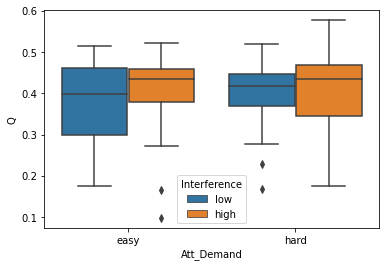

In [12]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference",
                 data=df)

##### Perform within-subjects, repeated measures ANOVA w/ interaction

In [13]:
# Run ANOVA with statsmodels
ANOVA_avg_q = AnovaRM(df, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_avg_q = ANOVA_avg_q.fit()

print(res_ANOVA_avg_q)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             1.4818 1.0000 26.0000 0.2344
Att_Demand               0.2757 1.0000 26.0000 0.6040
Interference:Att_Demand  0.7156 1.0000 26.0000 0.4053



In [14]:
# Run ANOVA with pingouin
ANOVA_avg_q = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df, detailed=True)
ANOVA_avg_q

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.005942,1,26,0.005942,1.481835,0.234421,0.234421,0.053921,1.0
1,Att_Demand,0.001500,1,26,0.001500,0.275674,0.603999,0.603999,0.010492,1.0
2,Interference * Att_Demand,0.004107,1,26,0.004107,0.715583,0.405315,0.405315,0.026785,1.0


# ANOVA 1st Q score

In [15]:

def run_rm_anova(q_num):
    # Paths to access files
    home_dir = "DistractWM/"
    c1_path = "/graph_metrics/q_cond1_space.npy"
    c2_path = "/graph_metrics/q_cond2_space.npy"
    c3_path = "/graph_metrics/q_cond3_space.npy"
    c4_path = "/graph_metrics/q_cond4_space.npy"

    # ...
    idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

    # Creat psudo-empty dataframe
    df = pd.DataFrame(columns=['Subject_ID', 'Interference', 'Att_Demand', 'Q'])

    for x in range(idx): 
    
        name = 'sub-'
        num = 102 + x
    
        if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
            name = name + str(num)
            full_path1 = home_dir + name + c1_path
            full_path2 = home_dir + name + c2_path
            full_path3 = home_dir + name + c3_path
            full_path4 = home_dir + name + c4_path
        
            # Loading data     
            c1 = np.load(full_path1) 
            c2 = np.load(full_path2) 
            c3 = np.load(full_path3) 
            c4 = np.load(full_path4) 
        
            c1 = c1[q_num]
            c2 = c2[q_num]
            c3 = c3[q_num]
            c4 = c4[q_num]
        
            # Interference labels 
            I1 = np.repeat(['low'], 1) #len(c1))
            I2 = np.repeat(['low'], 1) #len(c2))
            I3 = np.repeat(['high'], 1) #len(c3))
            I4 = np.repeat(['high'], 1) #len(c4))
        
            # Attentional Demand labels
            AD1 = np.repeat(['easy'], 1)  #len(c1))
            AD2 = np.repeat(['hard'], 1)  #len(c2))
            AD3 = np.repeat(['easy'], 1)  #len(c3))
            AD4 = np.repeat(['hard'], 1)  #len(c4))
        
            # Subject_ID labels
            SID = np.repeat([name], 1) 
    
            # Putting in dataframe format
            new_c1 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I1, 'Att_Demand': AD1, 'Q': c1}, index=range(1))
            new_c2 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I2, 'Att_Demand': AD2, 'Q': c2}, index=range(1))
            new_c3 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I3, 'Att_Demand': AD3, 'Q': c3}, index=range(1))
            new_c4 = pd.DataFrame(data={'Subject_ID': SID, 'Interference': I4, 'Att_Demand': AD4, 'Q': c4}, index=range(1))
        
            # Appending data to df
            df = df.append(new_c1, ignore_index = True)
            df = df.append(new_c2, ignore_index = True)
            df = df.append(new_c3, ignore_index = True)
            df = df.append(new_c4, ignore_index = True)
        
    return df

df_q1 = run_rm_anova(0)
df_q1.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.569228
1,sub-102,low,hard,0.549051
2,sub-102,high,easy,0.497686
3,sub-102,high,hard,0.503392
4,sub-103,low,easy,0.423376
5,sub-103,low,hard,0.398868
6,sub-103,high,easy,0.383352
7,sub-103,high,hard,0.447331
8,sub-104,low,easy,0.533194
9,sub-104,low,hard,0.528943


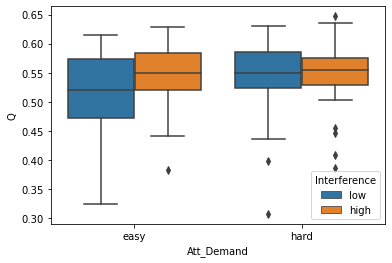

In [16]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q1)

##### Perform within-subjects, repeated measures ANOVA w/ interaction

In [17]:
# Run ANOVA with statmodels
ANOVA_Q1 = AnovaRM(df_q1, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q1 = ANOVA_Q1.fit()

print(res_ANOVA_Q1)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             4.4316 1.0000 26.0000 0.0451
Att_Demand               1.3274 1.0000 26.0000 0.2597
Interference:Att_Demand  1.6992 1.0000 26.0000 0.2038



In [18]:
# Run ANOVA with pingouin
ANOVA_Q1 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q1, detailed=True)
ANOVA_Q1


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.006407,1,26,0.006407,4.431617,0.045094,0.045094,0.145625,1.0
1,Att_Demand,0.003113,1,26,0.003113,1.327428,0.259747,0.259747,0.048575,1.0
2,Interference * Att_Demand,0.003029,1,26,0.003029,1.699228,0.203814,0.203814,0.061346,1.0


# ANOVA 2nd Q score

In [19]:
df_q2 = run_rm_anova(1)
df_q2.head(12)


,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.551409
1,sub-102,low,hard,0.525387
2,sub-102,high,easy,0.478491
3,sub-102,high,hard,0.483411
4,sub-103,low,easy,0.401123
5,sub-103,low,hard,0.384098
6,sub-103,high,easy,0.354875
7,sub-103,high,hard,0.419905
8,sub-104,low,easy,0.504241
9,sub-104,low,hard,0.504329


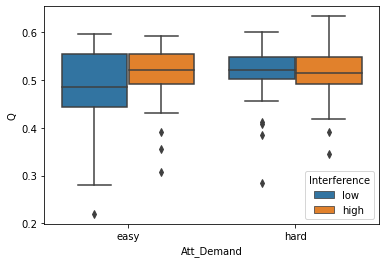

In [20]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q2)

##### Perform two-way ANOVA w/ interaction

In [21]:
# Run ANOVA with statmodels
ANOVA_Q2 = AnovaRM(df_q2, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q2 = ANOVA_Q2.fit()

print(res_ANOVA_Q2)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             4.8905 1.0000 26.0000 0.0360
Att_Demand               1.3665 1.0000 26.0000 0.2530
Interference:Att_Demand  1.8506 1.0000 26.0000 0.1854



In [22]:
# Run ANOVA with pingouin
ANOVA_Q2 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q2, detailed=True)
ANOVA_Q2

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.007256,1,26,0.007256,4.890473,0.036001,0.036001,0.158317,1.0
1,Att_Demand,0.004837,1,26,0.004837,1.366517,0.253018,0.253018,0.049934,1.0
2,Interference * Att_Demand,0.003756,1,26,0.003756,1.850627,0.185389,0.185389,0.066448,1.0


# ANOVA 3rd Q score

In [23]:
df_q3 = run_rm_anova(2)
df_q3.head(12)


,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.535820
1,sub-102,low,hard,0.498369
2,sub-102,high,easy,0.445549
3,sub-102,high,hard,0.447724
4,sub-103,low,easy,0.389680
5,sub-103,low,hard,0.375690
6,sub-103,high,easy,0.330730
7,sub-103,high,hard,0.387276
8,sub-104,low,easy,0.479184
9,sub-104,low,hard,0.482502


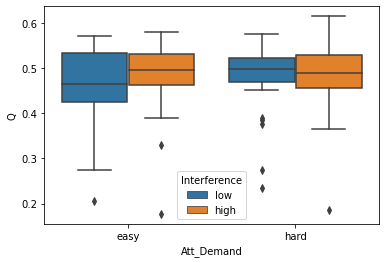

In [24]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q3)

##### Perform two-way ANOVA w/ interaction

In [25]:
# Run ANOVA with statmodels
ANOVA_Q3 = AnovaRM(df_q3, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q3 = ANOVA_Q3.fit()

print(res_ANOVA_Q3)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             2.5504 1.0000 26.0000 0.1224
Att_Demand               0.2775 1.0000 26.0000 0.6028
Interference:Att_Demand  0.8509 1.0000 26.0000 0.3648



In [26]:
# Run ANOVA with pingouin
ANOVA_Q3 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q3, detailed=True)
ANOVA_Q3

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.004879,1,26,0.004879,2.550354,0.122354,0.122354,0.089328,1.0
1,Att_Demand,0.001288,1,26,0.001288,0.277464,0.602834,0.602834,0.010559,1.0
2,Interference * Att_Demand,0.002285,1,26,0.002285,0.850900,0.364779,0.364779,0.031690,1.0


# ANOVA 4th Q score

In [27]:
df_q4 = run_rm_anova(3)
df_q4.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.512543
1,sub-102,low,hard,0.471613
2,sub-102,high,easy,0.426349
3,sub-102,high,hard,0.421039
4,sub-103,low,easy,0.375739
5,sub-103,low,hard,0.361910
6,sub-103,high,easy,0.007767
7,sub-103,high,hard,0.359886
8,sub-104,low,easy,0.457013
9,sub-104,low,hard,0.456077


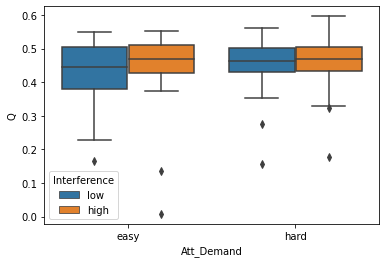

In [28]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q4)

##### Perform two-way ANOVA w/ interaction

In [29]:
# Run ANOVA with statmodels
ANOVA_Q4 = AnovaRM(df_q4, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q4 = ANOVA_Q4.fit()

print(res_ANOVA_Q4)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             1.5473 1.0000 26.0000 0.2246
Att_Demand               1.3339 1.0000 26.0000 0.2586
Interference:Att_Demand  0.1142 1.0000 26.0000 0.7381



In [30]:
# Run ANOVA with pingouin
ANOVA_Q4 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q4, detailed=True)
ANOVA_Q4

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.006100,1,26,0.006100,1.547270,0.224637,0.224637,0.056168,1.0
1,Att_Demand,0.007577,1,26,0.007577,1.333919,0.258614,0.258614,0.048801,1.0
2,Interference * Att_Demand,0.000581,1,26,0.000581,0.114237,0.738085,0.738085,0.004375,1.0


# ANOVA 5th Q score

In [31]:
df_q5 = run_rm_anova(4)
df_q5.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,0.496776
1,sub-102,low,hard,0.451165
2,sub-102,high,easy,0.271908
3,sub-102,high,hard,0.403101
4,sub-103,low,easy,0.359957
5,sub-103,low,hard,0.348756
6,sub-103,high,easy,0.001057
7,sub-103,high,hard,0.335249
8,sub-104,low,easy,0.438687
9,sub-104,low,hard,0.437354


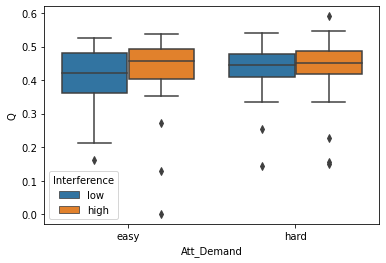

In [32]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q5)

##### Perform two-way ANOVA w/ interaction

In [33]:
# Run ANOVA with statmodels
ANOVA_Q5 = AnovaRM(df_q5, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q5 = ANOVA_Q5.fit()

print(res_ANOVA_Q5)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.5439 1.0000 26.0000 0.4674
Att_Demand               0.8661 1.0000 26.0000 0.3606
Interference:Att_Demand  0.1987 1.0000 26.0000 0.6595



In [34]:
# Run ANOVA with pingouin
ANOVA_Q5 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q5, detailed=True)
ANOVA_Q5

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.002694,1,26,0.002694,0.543940,0.467409,0.467409,0.020492,1.0
1,Att_Demand,0.005435,1,26,0.005435,0.866094,0.360600,0.360600,0.032237,1.0
2,Interference * Att_Demand,0.001339,1,26,0.001339,0.198681,0.659477,0.659477,0.007584,1.0


# ANOVA 6th Q score

In [35]:
df_q6 = run_rm_anova(5)
df_q6.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.548533e-01
1,sub-102,low,hard,4.413729e-01
2,sub-102,high,easy,2.105200e-01
3,sub-102,high,hard,3.810162e-01
4,sub-103,low,easy,3.417662e-01
5,sub-103,low,hard,3.330502e-01
6,sub-103,high,easy,2.220446e-15
7,sub-103,high,hard,3.145784e-01
8,sub-104,low,easy,4.189775e-01
9,sub-104,low,hard,4.141924e-01


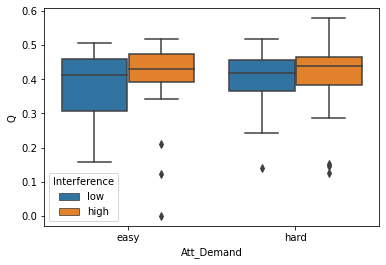

In [36]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q6)

##### Perform two-way ANOVA w/ interaction

In [37]:
# Run ANOVA with statmodels
ANOVA_Q6 = AnovaRM(df_q6, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q6 = ANOVA_Q6.fit()

print(res_ANOVA_Q6)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.6675 1.0000 26.0000 0.4214
Att_Demand               0.5346 1.0000 26.0000 0.4712
Interference:Att_Demand  0.4256 1.0000 26.0000 0.5199



In [38]:
# Run ANOVA with pingouin
ANOVA_Q6 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q6, detailed=True)
ANOVA_Q6

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.003861,1,26,0.003861,0.667491,0.421351,0.421351,0.025030,1.0
1,Att_Demand,0.003994,1,26,0.003994,0.534595,0.471220,0.471220,0.020147,1.0
2,Interference * Att_Demand,0.003347,1,26,0.003347,0.425612,0.519877,0.519877,0.016106,1.0


# ANOVA 7th Q score

In [39]:
df_q7 = run_rm_anova(6)
df_q7.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.404800e-01
1,sub-102,low,hard,4.276272e-01
2,sub-102,high,easy,2.029237e-01
3,sub-102,high,hard,3.770129e-01
4,sub-103,low,easy,3.249693e-01
5,sub-103,low,hard,3.198335e-01
6,sub-103,high,easy,8.881784e-15
7,sub-103,high,hard,1.088019e-14
8,sub-104,low,easy,3.535069e-01
9,sub-104,low,hard,3.991492e-01


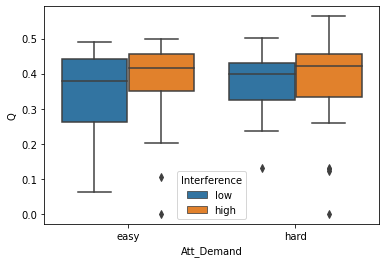

In [40]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q7)

##### Perform two-way ANOVA w/ interaction

In [41]:
# Run ANOVA with statmodels
ANOVA_Q7 = AnovaRM(df_q7, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q7 = ANOVA_Q7.fit()

print(res_ANOVA_Q7)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.8721 1.0000 26.0000 0.3590
Att_Demand               0.3317 1.0000 26.0000 0.5696
Interference:Att_Demand  1.8456 1.0000 26.0000 0.1860



In [42]:
# Run ANOVA with pingouin
ANOVA_Q7 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q7, detailed=True)
ANOVA_Q7

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.008972,1,26,0.008972,0.872107,0.358965,0.358965,0.032454,1.0
1,Att_Demand,0.003048,1,26,0.003048,0.331711,0.569606,0.569606,0.012597,1.0
2,Interference * Att_Demand,0.015920,1,26,0.015920,1.845628,0.185964,0.185964,0.066281,1.0


# ANOVA 8th Q score

In [43]:
df_q8 = run_rm_anova(7)
df_q8.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.349161e-01
1,sub-102,low,hard,4.128858e-01
2,sub-102,high,easy,1.825305e-01
3,sub-102,high,hard,3.657097e-01
4,sub-103,low,easy,3.145047e-01
5,sub-103,low,hard,1.887379e-14
6,sub-103,high,easy,1.110223e-14
7,sub-103,high,hard,1.598721e-14
8,sub-104,low,easy,3.403615e-01
9,sub-104,low,hard,3.635401e-01


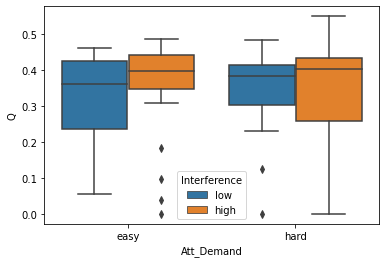

In [44]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q8)

##### Perform two-way ANOVA w/ interaction

In [45]:
# Run ANOVA with statmodels
ANOVA_Q8 = AnovaRM(df_q8, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q8 = ANOVA_Q8.fit()

print(res_ANOVA_Q8)

                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.5276 1.0000 26.0000 0.4741
Att_Demand               0.0266 1.0000 26.0000 0.8718
Interference:Att_Demand  1.4936 1.0000 26.0000 0.2326



In [46]:
# Run ANOVA with pingouin
ANOVA_Q8 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q8, detailed=True)
ANOVA_Q8

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.004317,1,26,0.004317,0.527575,0.474117,0.474117,0.019888,1.0
1,Att_Demand,0.000280,1,26,0.000280,0.026567,0.871784,0.871784,0.001021,1.0
2,Interference * Att_Demand,0.016377,1,26,0.016377,1.493637,0.232618,0.232618,0.054327,1.0


# ANOVA 9th Q score

In [47]:
df_q9 = run_rm_anova(8)
df_q9.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.227119e-01
1,sub-102,low,hard,3.969241e-01
2,sub-102,high,easy,1.577671e-01
3,sub-102,high,hard,1.279960e-01
4,sub-103,low,easy,3.079716e-01
5,sub-103,low,hard,1.199041e-14
6,sub-103,high,easy,-5.329071e-15
7,sub-103,high,hard,2.398082e-14
8,sub-104,low,easy,3.195358e-01
9,sub-104,low,hard,3.519637e-01


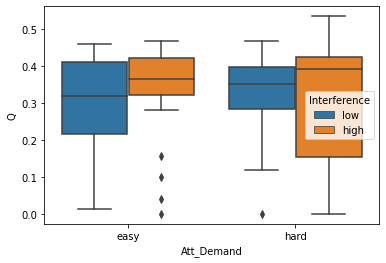

In [48]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q9)

##### Perform two-way ANOVA w/ interaction

In [49]:
# Run ANOVA with statmodels
ANOVA_Q9 = AnovaRM(df_q9, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q9 = ANOVA_Q9.fit()

print(res_ANOVA_Q9)


                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.2143 1.0000 26.0000 0.6473
Att_Demand               0.0064 1.0000 26.0000 0.9367
Interference:Att_Demand  1.7742 1.0000 26.0000 0.1944



In [50]:
# Run ANOVA with pingouin
ANOVA_Q9 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q9, detailed=True)
ANOVA_Q9

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.002047,1,26,0.002047,0.214324,0.647251,0.647251,0.008176,1.0
1,Att_Demand,0.000071,1,26,0.000071,0.006437,0.936667,0.936667,0.000248,1.0
2,Interference * Att_Demand,0.021305,1,26,0.021305,1.774212,0.194421,0.194421,0.063880,1.0


# ANOVA 10th Q score

In [51]:
df_q10 = run_rm_anova(9)
df_q10.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.058393e-01
1,sub-102,low,hard,1.102765e-01
2,sub-102,high,easy,8.704610e-02
3,sub-102,high,hard,1.205653e-01
4,sub-103,low,easy,3.065746e-01
5,sub-103,low,hard,1.243450e-14
6,sub-103,high,easy,-1.332268e-14
7,sub-103,high,hard,1.842970e-14
8,sub-104,low,easy,3.101595e-01
9,sub-104,low,hard,3.405031e-01


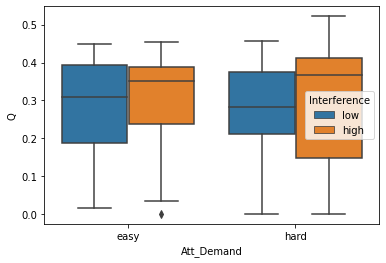

In [52]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q10)

##### Perform two-way ANOVA w/ interaction

In [53]:
# Run ANOVA with statmodels
ANOVA_Q10 = AnovaRM(df_q10, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q10 = ANOVA_Q10.fit()

print(res_ANOVA_Q10)


                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             1.5928 1.0000 26.0000 0.2181
Att_Demand               0.1195 1.0000 26.0000 0.7323
Interference:Att_Demand  0.0114 1.0000 26.0000 0.9158



In [54]:
# Run ANOVA with pingouin
ANOVA_Q10 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q10, detailed=True)
ANOVA_Q10

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.011603,1,26,0.011603,1.592797,0.218131,0.218131,0.057725,1.0
1,Att_Demand,0.001609,1,26,0.001609,0.119528,0.732329,0.732329,0.004576,1.0
2,Interference * Att_Demand,0.000121,1,26,0.000121,0.011408,0.915762,0.915762,0.000439,1.0


# ANOVA 11th Q score

In [55]:
df_q11 = run_rm_anova(10)
df_q11.head(12)

,Subject_ID,Interference,Att_Demand,Q
0,sub-102,low,easy,4.010040e-01
1,sub-102,low,hard,1.100815e-01
2,sub-102,high,easy,3.566950e-02
3,sub-102,high,hard,1.176772e-01
4,sub-103,low,easy,3.065746e-01
5,sub-103,low,hard,1.243450e-14
6,sub-103,high,easy,-1.065814e-14
7,sub-103,high,hard,1.643130e-14
8,sub-104,low,easy,2.757040e-01
9,sub-104,low,hard,3.221890e-01


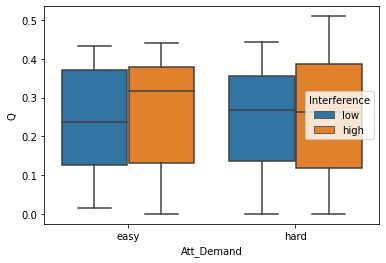

In [56]:
# Visualizing data 
ax = sns.boxplot(x="Att_Demand", y="Q", hue="Interference", data=df_q11)

##### Perform two-way ANOVA w/ interaction

In [57]:
# Run ANOVA with statmodels
ANOVA_Q11 = AnovaRM(df_q11, 'Q', 'Subject_ID', within=['Interference', 'Att_Demand'])
res_ANOVA_Q11 = ANOVA_Q11.fit()

print(res_ANOVA_Q11)


                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
Interference             0.9370 1.0000 26.0000 0.3420
Att_Demand               0.0261 1.0000 26.0000 0.8729
Interference:Att_Demand  0.0629 1.0000 26.0000 0.8040



In [58]:
# Run ANOVA with pingouin
ANOVA_Q11 = pg.rm_anova(dv='Q', within=['Interference', 'Att_Demand'], subject='Subject_ID', data=df_q11, detailed=True)
ANOVA_Q11

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Interference,0.011524,1,26,0.011524,0.936958,0.341980,0.341980,0.034783,1.0
1,Att_Demand,0.000304,1,26,0.000304,0.026114,0.872871,0.872871,0.001003,1.0
2,Interference * Att_Demand,0.001097,1,26,0.001097,0.062871,0.803985,0.803985,0.002412,1.0


# Formating CSV file

In [ ]:
# 27 rows x (4*11 columns)
indexer = np.array(range(1))
print(indexer)

In [ ]:
# Paths to access files
home_dir = "DistractWM/"
c1_path = "/graph_metrics/q_cond1_space.npy"
c2_path = "/graph_metrics/q_cond2_space.npy"
c3_path = "/graph_metrics/q_cond3_space.npy"
c4_path = "/graph_metrics/q_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

# Creat psudo-empty dataframe
df = pd.DataFrame(columns=['Q1_C1', 'Q1_C2', 'Q1_C3', 'Q1_C4',
                          'Q2_C1', 'Q2_C2', 'Q2_C3', 'Q2_C4',
                          'Q3_C1', 'Q3_C2', 'Q3_C3', 'Q3_C4',
                          'Q4_C1', 'Q4_C2', 'Q4_C3', 'Q4_C4',
                          'Q5_C1', 'Q5_C2', 'Q5_C3', 'Q5_C4',
                          'Q6_C1', 'Q6_C2', 'Q6_C3', 'Q6_C4',
                          'Q7_C1', 'Q7_C2', 'Q7_C3', 'Q7_C4',
                          'Q8_C1', 'Q8_C2', 'Q8_C3', 'Q8_C4',
                          'Q9_C1', 'Q9_C2', 'Q9_C3', 'Q9_C4',
                          'Q10_C1', 'Q10_C2', 'Q10_C3', 'Q10_C4',
                          'Q11_C1', 'Q11_C2', 'Q11_C3', 'Q11_C4'])

subs = list()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    if(not((num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_path1 = home_dir + name + c1_path
        full_path2 = home_dir + name + c2_path
        full_path3 = home_dir + name + c3_path
        full_path4 = home_dir + name + c4_path
        
        # Loading data     
        c1 = np.load(full_path1) 
        c2 = np.load(full_path2) 
        c3 = np.load(full_path3) 
        c4 = np.load(full_path4) 
        
        c1 = c1[:11]
        c2 = c2[:11]
        c3 = c3[:11]
        c4 = c4[:11]
        
        subs.append(name)
        
        # Interference labels 
        #I1 = np.repeat(['low'], 1) #len(c1))
        #I2 = np.repeat(['low'], 1) #len(c2))
        #I3 = np.repeat(['high'], 1) #len(c3))
        #I4 = np.repeat(['high'], 1) #len(c4))
        
        # Attentional Demand labels
        #AD1 = np.repeat(['easy'], 1)  #len(c1))
        #AD2 = np.repeat(['hard'], 1)  #len(c2))
        #AD3 = np.repeat(['easy'], 1)  #len(c3))
        #AD4 = np.repeat(['hard'], 1)  #len(c4))
    
        # Putting in dataframe format
        new_c1 = pd.DataFrame(data={'Q1_C1': c1[0], 'Q1_C2': c2[0], 'Q1_C3': c3[0], 'Q1_C4': c4[0],
                                   'Q2_C1': c1[1], 'Q2_C2': c2[1], 'Q2_C3': c3[1], 'Q2_C4': c4[1],
                                   'Q3_C1': c1[2], 'Q3_C2': c2[2], 'Q3_C3': c3[2], 'Q3_C4': c4[2],
                                   'Q4_C1': c1[3], 'Q4_C2': c2[3], 'Q4_C3': c3[3], 'Q4_C4': c4[3],
                                   'Q5_C1': c1[4], 'Q5_C2': c2[4], 'Q5_C3': c3[4], 'Q5_C4': c4[4],
                                   'Q6_C1': c1[5], 'Q6_C2': c2[5], 'Q6_C3': c3[5], 'Q6_C4': c4[5],
                                   'Q7_C1': c1[6], 'Q7_C2': c2[6], 'Q7_C3': c3[6], 'Q7_C4': c4[6],
                                   'Q8_C1': c1[7], 'Q8_C2': c2[7], 'Q8_C3': c3[7], 'Q8_C4': c4[7],
                                   'Q9_C1': c1[8], 'Q9_C2': c2[8], 'Q9_C3': c3[8], 'Q9_C4': c4[8],
                                   'Q10_C1': c1[9], 'Q10_C2': c2[9], 'Q10_C3': c3[9], 'Q10_C4': c4[9],
                                   'Q11_C1': c1[10], 'Q11_C2': c2[10], 'Q11_C3': c3[10], 'Q11_C4': c4[10]}, index=indexer) #, index=indexer[x]
        #new_c2 = pd.DataFrame(data={'Interference': I2, 'Att_Demand': AD2, 'Q': c2}, index=range(1))
        #new_c3 = pd.DataFrame(data={'Interference': I3, 'Att_Demand': AD3, 'Q': c3}, index=range(1))
        #new_c4 = pd.DataFrame(data={'Interference': I4, 'Att_Demand': AD4, 'Q': c4}, index=range(1))
        
        # Appending data to df
        df = df.append(new_c1, ignore_index = False)
        #df = df.append(new_c2, ignore_index = True)
        #df = df.append(new_c3, ignore_index = True)
        #df = df.append(new_c4, ignore_index = True)
             
print(df.shape)
#df.to_csv('GitHub/Summer_2021_fMRI/Formated_for_ANOVA.csv', sep='\t') 
df

In [ ]:
df.index = subs
df.head(27)

In [ ]:
df.to_csv('GitHub/Summer_2021_fMRI/Formated_for_ANOVA.csv', sep='\t') 